In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#pd.set_option("display.max_rows", 1000)
pd.set_option("display.max_columns", 100)

In [78]:
file_paths = {'in':'../../data/raw/activity_log.csv',
              'out':'../../data/processed/activity_log.csv'
             }

In [79]:
df = pd.read_csv(file_paths['in'])

In [80]:
df.shape

(284, 83)

In [81]:
df.head(2)

,Activity ID,Activity Date,Activity Name,Activity Type,Activity Description,Elapsed Time,Distance,Max Heart Rate,Relative Effort,Commute,Activity Gear,Filename,Athlete Weight,Bike Weight,Elapsed Time.1,Moving Time,Distance.1,Max Speed,Average Speed,Elevation Gain,Elevation Loss,Elevation Low,Elevation High,Max Grade,Average Grade,Average Positive Grade,Average Negative Grade,Max Cadence,Average Cadence,Max Heart Rate.1,Average Heart Rate,Max Watts,Average Watts,Calories,Max Temperature,Average Temperature,Relative Effort.1,Total Work,Number of Runs,Uphill Time,Downhill Time,Other Time,Perceived Exertion,"<span class=""translation_missing"" title=""translation missing: en-US.lib.export.portability_exporter.activities.horton_values.type"">Type</span>","<span class=""translation_missing"" title=""translation missing: en-US.lib.export.portability_exporter.activities.horton_values.start_time"">Start Time</span>",Weighted Average Power,Power Count,Prefer Perceived Exertion,Perceived Relative Effort,Commute.1,Total Weight Lifted,From Upload,Grade Adjusted Distance,Weather Observation Time,Weather Condition,Weather Temperature,Apparent Temperature,Dewpoint,Humidity,Weather Pressure,Wind Speed,Wind Gust,Wind Bearing,Precipitation Intensity,Sunrise Time,Sunset Time,Moon Phase,Bike,Gear,Precipitation Probability,Precipitation Type,Cloud Cover,Weather Visibility,UV Index,Weather Ozone,"<span class=""translation_missing"" title=""translation missing: en-US.lib.export.portability_exporter.activities.horton_values.jump_count"">Jump Count</span>","<span class=""translation_missing"" title=""translation missing: en-US.lib.export.portability_exporter.activities.horton_values.total_grit"">Total Grit</span>","<span class=""translation_missing"" title=""translation missing: en-US.lib.export.portability_exporter.activities.horton_values.avg_flow"">Avg Flow</span>","<span class=""translation_missing"" title=""translation missing: en-US.lib.export.portability_exporter.activities.horton_values.flagged"">Flagged</span>","<span class=""translation_missing"" title=""translation missing: en-US.lib.export.portability_exporter.activities.horton_values.avg_elapsed_speed"">Avg Elapsed Speed</span>","<span class=""translation_missing"" title=""translation missing: en-US.lib.export.portability_exporter.activities.horton_values.dirt_distance"">Dirt Distance</span>","<span class=""translation_missing"" title=""translation missing: en-US.lib.export.portability_exporter.activities.horton_values.newly_explored_distance"">Newly Explored Distance</span>","<span class=""translation_missing"" title=""translation missing: en-US.lib.export.portability_exporter.activities.horton_values.newly_explored_dirt_distance"">Newly Explored Dirt Distance</span>"
0,1595697949,"May 25, 2018, 7:47:31 PM",Rock wall,Ride,NaN,2578,11.25,NaN,NaN,False,NaN,activities/1595697949.gpx,89.811302,NaN,2578.0,1908,11251.299800,10.0,NaN,43.765896,NaN,213.899994,227.300003,19.4,-0.047994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1617777375,"Jun 4, 2018, 11:40:17 PM",Hole back from Grand view point,Hike,NaN,3775,5.13,NaN,NaN,False,NaN,activities/1617777375.gpx,89.811302,NaN,3775.0,3640,5130.899902,2.8,NaN,26.226250,NaN,2086.000000,2278.500000,17.4,-3.667973,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,566.191467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 1. Collecting Columns of Interest
Not every column of the 83 is relevant. This will be the process to remove non-useful columns and normalize the names of the remaining

In [82]:
print(list(df.columns))

['Activity ID', 'Activity Date', 'Activity Name', 'Activity Type', 'Activity Description', 'Elapsed Time', 'Distance', 'Max Heart Rate', 'Relative Effort', 'Commute', 'Activity Gear', 'Filename', 'Athlete Weight', 'Bike Weight', 'Elapsed Time.1', 'Moving Time', 'Distance.1', 'Max Speed', 'Average Speed', 'Elevation Gain', 'Elevation Loss', 'Elevation Low', 'Elevation High', 'Max Grade', 'Average Grade', 'Average Positive Grade', 'Average Negative Grade', 'Max Cadence', 'Average Cadence', 'Max Heart Rate.1', 'Average Heart Rate', 'Max Watts', 'Average Watts', 'Calories', 'Max Temperature', 'Average Temperature', 'Relative Effort.1', 'Total Work', 'Number of Runs', 'Uphill Time', 'Downhill Time', 'Other Time', 'Perceived Exertion', '<span class="translation_missing" title="translation missing: en-US.lib.export.portability_exporter.activities.horton_values.type">Type</span>', '<span class="translation_missing" title="translation missing: en-US.lib.export.portability_exporter.activities.ho

In [83]:
# remove any columns that contain "<span" in their name...
cols_of_interest = [x for x in df.columns if '<span' not in x]

In [84]:
# subset the dataframe to remove these <span> columns
df = df[cols_of_interest]

In [85]:
print(cols_of_interest)

['Activity ID', 'Activity Date', 'Activity Name', 'Activity Type', 'Activity Description', 'Elapsed Time', 'Distance', 'Max Heart Rate', 'Relative Effort', 'Commute', 'Activity Gear', 'Filename', 'Athlete Weight', 'Bike Weight', 'Elapsed Time.1', 'Moving Time', 'Distance.1', 'Max Speed', 'Average Speed', 'Elevation Gain', 'Elevation Loss', 'Elevation Low', 'Elevation High', 'Max Grade', 'Average Grade', 'Average Positive Grade', 'Average Negative Grade', 'Max Cadence', 'Average Cadence', 'Max Heart Rate.1', 'Average Heart Rate', 'Max Watts', 'Average Watts', 'Calories', 'Max Temperature', 'Average Temperature', 'Relative Effort.1', 'Total Work', 'Number of Runs', 'Uphill Time', 'Downhill Time', 'Other Time', 'Perceived Exertion', 'Weighted Average Power', 'Power Count', 'Prefer Perceived Exertion', 'Perceived Relative Effort', 'Commute.1', 'Total Weight Lifted', 'From Upload', 'Grade Adjusted Distance', 'Weather Observation Time', 'Weather Condition', 'Weather Temperature', 'Apparent T

In [86]:
# make all column names lower case. Additionally, replace any '.' or ' ' characters with '_'
cols_of_interest = [x.lower().replace(' ','_').replace('.','_') for x in cols_of_interest]
print(cols_of_interest)

['activity_id', 'activity_date', 'activity_name', 'activity_type', 'activity_description', 'elapsed_time', 'distance', 'max_heart_rate', 'relative_effort', 'commute', 'activity_gear', 'filename', 'athlete_weight', 'bike_weight', 'elapsed_time_1', 'moving_time', 'distance_1', 'max_speed', 'average_speed', 'elevation_gain', 'elevation_loss', 'elevation_low', 'elevation_high', 'max_grade', 'average_grade', 'average_positive_grade', 'average_negative_grade', 'max_cadence', 'average_cadence', 'max_heart_rate_1', 'average_heart_rate', 'max_watts', 'average_watts', 'calories', 'max_temperature', 'average_temperature', 'relative_effort_1', 'total_work', 'number_of_runs', 'uphill_time', 'downhill_time', 'other_time', 'perceived_exertion', 'weighted_average_power', 'power_count', 'prefer_perceived_exertion', 'perceived_relative_effort', 'commute_1', 'total_weight_lifted', 'from_upload', 'grade_adjusted_distance', 'weather_observation_time', 'weather_condition', 'weather_temperature', 'apparent_t

In [87]:
# Shorten the column names by replacing 'average' with 'avg'
cols_of_interest = [x.replace('average','avg') for x in cols_of_interest]
print(cols_of_interest)

['activity_id', 'activity_date', 'activity_name', 'activity_type', 'activity_description', 'elapsed_time', 'distance', 'max_heart_rate', 'relative_effort', 'commute', 'activity_gear', 'filename', 'athlete_weight', 'bike_weight', 'elapsed_time_1', 'moving_time', 'distance_1', 'max_speed', 'avg_speed', 'elevation_gain', 'elevation_loss', 'elevation_low', 'elevation_high', 'max_grade', 'avg_grade', 'avg_positive_grade', 'avg_negative_grade', 'max_cadence', 'avg_cadence', 'max_heart_rate_1', 'avg_heart_rate', 'max_watts', 'avg_watts', 'calories', 'max_temperature', 'avg_temperature', 'relative_effort_1', 'total_work', 'number_of_runs', 'uphill_time', 'downhill_time', 'other_time', 'perceived_exertion', 'weighted_avg_power', 'power_count', 'prefer_perceived_exertion', 'perceived_relative_effort', 'commute_1', 'total_weight_lifted', 'from_upload', 'grade_adjusted_distance', 'weather_observation_time', 'weather_condition', 'weather_temperature', 'apparent_temperature', 'dewpoint', 'humidity',

In [88]:
# Rename the columns to their lower-case, shorter forms
df.columns = cols_of_interest

In [89]:
df.head(2)

,activity_id,activity_date,activity_name,activity_type,activity_description,elapsed_time,distance,max_heart_rate,relative_effort,commute,activity_gear,filename,athlete_weight,bike_weight,elapsed_time_1,moving_time,distance_1,max_speed,avg_speed,elevation_gain,elevation_loss,elevation_low,elevation_high,max_grade,avg_grade,avg_positive_grade,avg_negative_grade,max_cadence,avg_cadence,max_heart_rate_1,avg_heart_rate,max_watts,avg_watts,calories,max_temperature,avg_temperature,relative_effort_1,total_work,number_of_runs,uphill_time,downhill_time,other_time,perceived_exertion,weighted_avg_power,power_count,prefer_perceived_exertion,perceived_relative_effort,commute_1,total_weight_lifted,from_upload,grade_adjusted_distance,weather_observation_time,weather_condition,weather_temperature,apparent_temperature,dewpoint,humidity,weather_pressure,wind_speed,wind_gust,wind_bearing,precipitation_intensity,sunrise_time,sunset_time,moon_phase,bike,gear,precipitation_probability,precipitation_type,cloud_cover,weather_visibility,uv_index,weather_ozone
0,1595697949,"May 25, 2018, 7:47:31 PM",Rock wall,Ride,NaN,2578,11.25,NaN,NaN,False,NaN,activities/1595697949.gpx,89.811302,NaN,2578.0,1908,11251.299800,10.0,NaN,43.765896,NaN,213.899994,227.300003,19.4,-0.047994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1617777375,"Jun 4, 2018, 11:40:17 PM",Hole back from Grand view point,Hike,NaN,3775,5.13,NaN,NaN,False,NaN,activities/1617777375.gpx,89.811302,NaN,3775.0,3640,5130.899902,2.8,NaN,26.226250,NaN,2086.000000,2278.500000,17.4,-3.667973,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,566.191467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 2. Checking Column Sparsity

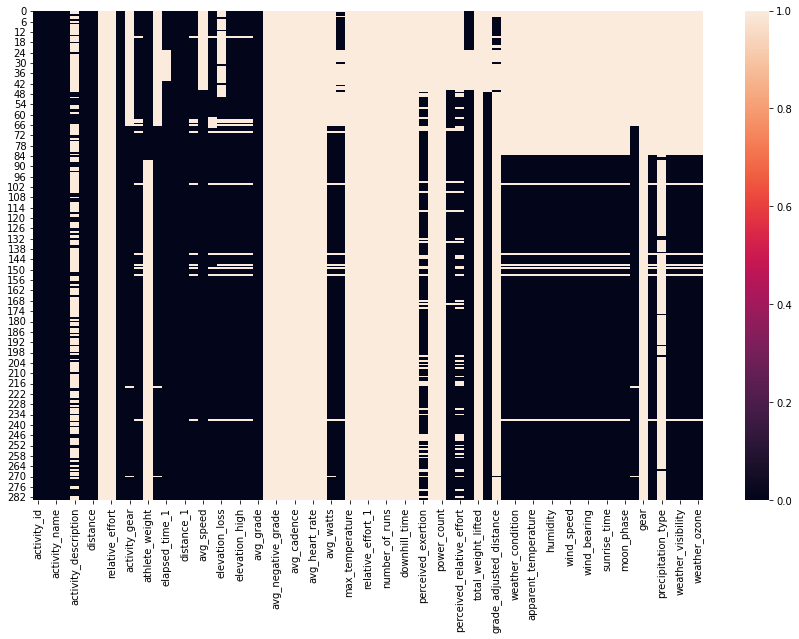

In [90]:
fig = plt.figure(figsize=(15,9))
_ = sns.heatmap(df.isna())

In [91]:
# Check each column for 100% Sparsity (all rows == NULL) and remove the column if true
n_cols_before = len(df.columns)
non_null_columns = []

for column in df.columns:
    if np.mean(df[column].isna()) < 1.0:
        non_null_columns.append(column)

df = df[non_null_columns]
print(f'Removed {n_cols_before-len(non_null_columns)} columns missing 100% of their data.')
print(f'There are {len(non_null_columns)} columns left.')

Removed 21 columns missing 100% of their data.
There are 52 columns left.


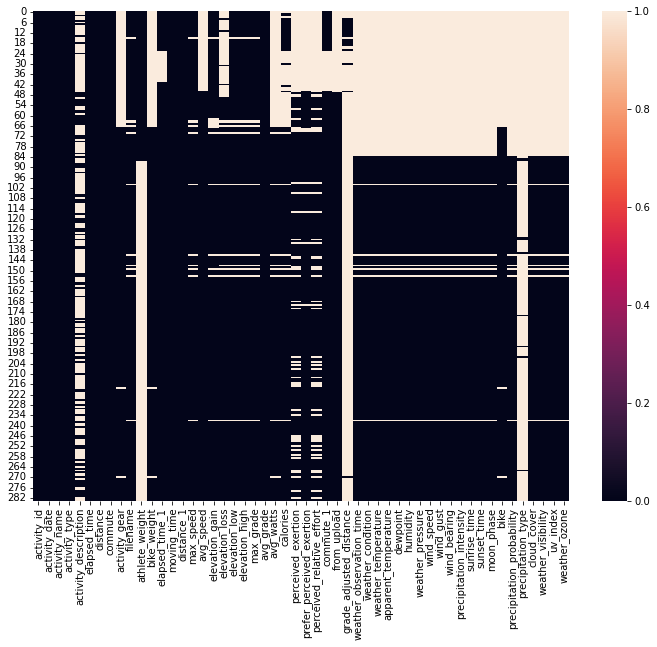

In [92]:
fig = plt.figure(figsize=(12,9))
_ = sns.heatmap(df.isna())

# 3. Pandas Profiling

In [94]:
from pandas_profiling import ProfileReport
prof = ProfileReport(df, minimal=True)
prof.to_file(output_file='../../data/raw/profiled_activity_log.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### Profiled Activity Log Observation
- `activity_id` is a unique identifier (unique globally to all Strava activities)
- `activity_date` is a useful column that can also generate Time-of-Day and Day-of-Week columns/insights
- `activity_name` is not as useful, but the length of the name can sometimes indicate how tired or rushed I was after finishing a ride
- `activity_type` is composed of 259 rides that we care about
- `activity_description` is not useful, but perhaps the len of it is?
- `elapsed_time` is right skewed with a median time of nearly 1 hour. (units appear to be in seconds)
- `distance` is again right skewed, but the median is 13.935. Units appear to be in kilometers. (This is verified by checking against a known 50 mile ride)
- `commute` is useless. **DROP**
- `activity_gear` lists which bike I used (2 options). Useful to match to the different masses of each bike, but that is recorded in `bike_weight` so this can be dropped. **DROP**
- `filename` is a relative path the `activity_id`.gpx file. This is redundant. **DROP**
- `athlete_weight` appears to my singular weight in kilograms. I will need to revise this with a better estimate over time. **DROP and revise**
- `bike_weight` is the weight of my different bikes in kilograms
- `elapsed_time_1` appears to mostly be redudant to `elapsed_time`, however there are 18 missing values which could explain the slight quartile differences. **DROP**
- `moving_time` is the subset of `elapsed_time` in which I was actually biking.
- `distance_1` is the distance in meters. **DROP**
- `max_speed` is the max speed of a ride in meters per second. These values seem to be very tightly distributed with low skew and a few outliers
- `avg_speed` is the mean speed of a ride in meters per second (median value of this column is 5.35 m/s --> 11.96 MPH). This is left skewed with a sharp fall off for faster average rides
- `elevation_gain` is in meters
- `elevation_loss` is also in meters
- `elevation_low` and `elevation_high
